## K-Nearest Neighbor - KNN

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Load the dataset
data = pd.read_csv('emissions_reduction_data.csv')
data.head()

,energy_efficiency,renewable_ratio,technology_cost,emission_reduction
0,68.727006,0.373641,7569.984799,0
1,97.535715,0.332912,2660.607960,0
2,86.599697,0.176154,4119.757249,0
3,79.932924,0.607267,6969.525732,1
4,57.800932,0.476624,5338.804101,0


In [3]:
# Check for the missing values
data.isnull().sum()

energy_efficiency     0
renewable_ratio       0
technology_cost       0
emission_reduction    0
dtype: int64

In [4]:
# Shape of the data
data.shape

(10000, 4)

In [5]:
data.columns

Index(['energy_efficiency', 'renewable_ratio', 'technology_cost',
       'emission_reduction'],
      dtype='object')

In [6]:
# Feature Selection
X = data[['energy_efficiency', 'renewable_ratio', 'technology_cost']]
y = data['emission_reduction']

In [7]:
# Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# Normalizing the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Let us set k to 5 and check
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [11]:
# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)

Accuracy: 0.99


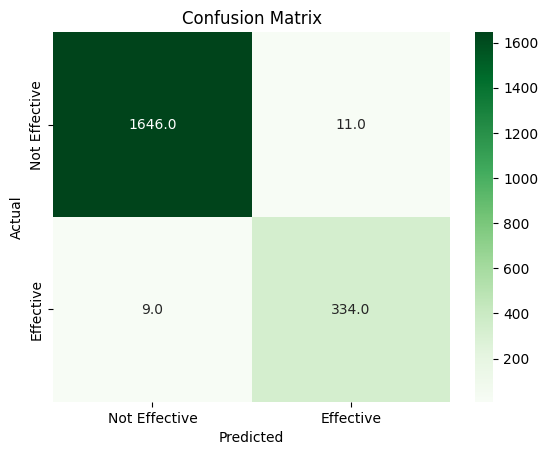

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.1f', cmap='Greens',
           xticklabels=['Not Effective', 'Effective'],
           yticklabels=['Not Effective', 'Effective'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Classification report
cr = classification_report(y_test, y_pred, target_names=['Not Effective', 'Effective'])
print(cr)

               precision    recall  f1-score   support

Not Effective       0.99      0.99      0.99      1657
    Effective       0.97      0.97      0.97       343

     accuracy                           0.99      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.99      0.99      0.99      2000



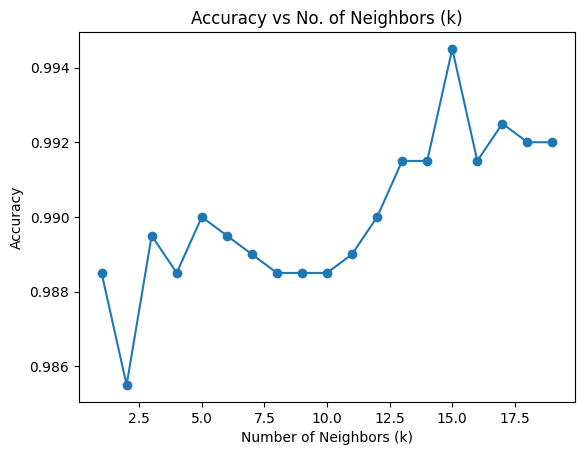

In [14]:
# Trying with different k values
acc_scores = []
k_values = range(1, 20)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_scores.append(accuracy_score(y_test, y_pred))

# Plotting acc vs k
plt.plot(k_values, acc_scores, marker='o')
plt.title('Accuracy vs No. of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()